In [1]:
## 순환신경망 모델

# for epoch_idx in range(1000):
#     print('epochs : ' + str(epoch_idx))
#     hist = model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False) #50
# is X.shape[0]
#     model.reset_states()

## history error

In [2]:
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

Using TensorFlow backend.


In [3]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') /255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print('epochs : ' + str(epoch_idx))
    model.fit(x_train, y_train, epochs=1, batch_size=10, validation_data=(x_val, y_val), callbacks=[custom_hist])

epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 1s 2ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 201us/step - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1906 - val_acc: 0.1800
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 205us/step - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1640 - val_acc: 0.1833
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 178us/step - loss: 2.1446 - acc: 0.1957 - val_loss: 2.1409 - val_acc: 0.1833
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 216us/step - loss: 2.1187 - acc: 0.1929 - val_loss: 2.1152 - val_acc: 0.2000
epochs : 5
Train on 700 samples, validate on 300 sam

epochs : 43
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.8014 - acc: 0.2400 - val_loss: 1.8582 - val_acc: 0.1967
epochs : 44
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 201us/step - loss: 1.7983 - acc: 0.2486 - val_loss: 1.8590 - val_acc: 0.1933
epochs : 45
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.7950 - acc: 0.2500 - val_loss: 1.8566 - val_acc: 0.1800
epochs : 46
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 199us/step - loss: 1.7920 - acc: 0.2386 - val_loss: 1.8562 - val_acc: 0.1900
epochs : 47
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 198us/step - loss: 1.7892 - acc: 0.2471 - val_loss: 1.8547 - val_acc: 0.2000
epochs : 48
Train on 700 samples, validate on

epochs : 86
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 201us/step - loss: 1.7069 - acc: 0.3057 - val_loss: 1.8149 - val_acc: 0.2633
epochs : 87
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 208us/step - loss: 1.7061 - acc: 0.2929 - val_loss: 1.8130 - val_acc: 0.2267
epochs : 88
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.7038 - acc: 0.2914 - val_loss: 1.8253 - val_acc: 0.2267
epochs : 89
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.7028 - acc: 0.2914 - val_loss: 1.8216 - val_acc: 0.2700
epochs : 90
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 208us/step - loss: 1.7013 - acc: 0.3100 - val_loss: 1.8210 - val_acc: 0.2167
epochs : 91
Train on 700 samples, validate on

700/700 [==============================] - 0s 211us/step - loss: 1.6563 - acc: 0.3157 - val_loss: 1.8292 - val_acc: 0.2500
epochs : 129
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.6545 - acc: 0.3286 - val_loss: 1.8208 - val_acc: 0.2700
epochs : 130
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 192us/step - loss: 1.6547 - acc: 0.3229 - val_loss: 1.8253 - val_acc: 0.2633
epochs : 131
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 198us/step - loss: 1.6539 - acc: 0.3186 - val_loss: 1.8224 - val_acc: 0.2233
epochs : 132
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.6518 - acc: 0.3329 - val_loss: 1.8217 - val_acc: 0.2367
epochs : 133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 197us/step - loss: 1.6171 - acc: 0.3371 - val_loss: 1.8328 - val_acc: 0.2233
epochs : 172
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.6184 - acc: 0.3257 - val_loss: 1.8498 - val_acc: 0.2333
epochs : 173
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.6163 - acc: 0.3371 - val_loss: 1.8431 - val_acc: 0.2233
epochs : 174
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 187us/step - loss: 1.6151 - acc: 0.3400 - val_loss: 1.8481 - val_acc: 0.2200
epochs : 175
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.6135 - acc: 0.3286 - val_loss: 1.8306 - val_acc: 0.2600
epochs : 176
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 195us/step - loss: 1.5891 - acc: 0.3457 - val_loss: 1.8487 - val_acc: 0.2533
epochs : 215
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 200us/step - loss: 1.5886 - acc: 0.3457 - val_loss: 1.8538 - val_acc: 0.2333
epochs : 216
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 176us/step - loss: 1.5873 - acc: 0.3429 - val_loss: 1.8594 - val_acc: 0.2267
epochs : 217
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.5874 - acc: 0.3500 - val_loss: 1.8537 - val_acc: 0.2200
epochs : 218
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 209us/step - loss: 1.5860 - acc: 0.3457 - val_loss: 1.8584 - val_acc: 0.2133
epochs : 219
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 169us/step - loss: 1.5673 - acc: 0.3586 - val_loss: 1.8779 - val_acc: 0.2200
epochs : 258
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.5656 - acc: 0.3629 - val_loss: 1.9017 - val_acc: 0.2233
epochs : 259
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 187us/step - loss: 1.5650 - acc: 0.3400 - val_loss: 1.8733 - val_acc: 0.2167
epochs : 260
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.5651 - acc: 0.3543 - val_loss: 1.8759 - val_acc: 0.2233
epochs : 261
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 205us/step - loss: 1.5641 - acc: 0.3557 - val_loss: 1.8891 - val_acc: 0.2267
epochs : 262
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 191us/step - loss: 1.5457 - acc: 0.3600 - val_loss: 1.8886 - val_acc: 0.2300
epochs : 301
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.5474 - acc: 0.3686 - val_loss: 1.9019 - val_acc: 0.2300
epochs : 302
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 186us/step - loss: 1.5463 - acc: 0.3671 - val_loss: 1.9080 - val_acc: 0.2300
epochs : 303
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.5450 - acc: 0.3600 - val_loss: 1.9069 - val_acc: 0.2167
epochs : 304
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 201us/step - loss: 1.5446 - acc: 0.3586 - val_loss: 1.9042 - val_acc: 0.2200
epochs : 305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 199us/step - loss: 1.5319 - acc: 0.3657 - val_loss: 1.9143 - val_acc: 0.2133
epochs : 344
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 215us/step - loss: 1.5299 - acc: 0.3700 - val_loss: 1.9460 - val_acc: 0.2400
epochs : 345
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 214us/step - loss: 1.5295 - acc: 0.3629 - val_loss: 1.9347 - val_acc: 0.2267
epochs : 346
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 236us/step - loss: 1.5288 - acc: 0.3729 - val_loss: 1.9372 - val_acc: 0.2233
epochs : 347
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 216us/step - loss: 1.5287 - acc: 0.3729 - val_loss: 1.9343 - val_acc: 0.2400
epochs : 348
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 196us/step - loss: 1.5143 - acc: 0.3714 - val_loss: 1.9594 - val_acc: 0.2300
epochs : 387
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.5147 - acc: 0.3743 - val_loss: 1.9526 - val_acc: 0.2200
epochs : 388
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 200us/step - loss: 1.5131 - acc: 0.3843 - val_loss: 1.9698 - val_acc: 0.2367
epochs : 389
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 198us/step - loss: 1.5135 - acc: 0.3629 - val_loss: 1.9494 - val_acc: 0.2300
epochs : 390
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.5128 - acc: 0.3729 - val_loss: 1.9635 - val_acc: 0.2300
epochs : 391
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 195us/step - loss: 1.4978 - acc: 0.3886 - val_loss: 1.9785 - val_acc: 0.2333
epochs : 430
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 190us/step - loss: 1.4976 - acc: 0.3886 - val_loss: 1.9860 - val_acc: 0.2267
epochs : 431
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4981 - acc: 0.3800 - val_loss: 1.9850 - val_acc: 0.2267
epochs : 432
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.4956 - acc: 0.3814 - val_loss: 1.9707 - val_acc: 0.2467
epochs : 433
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 210us/step - loss: 1.4976 - acc: 0.3714 - val_loss: 1.9776 - val_acc: 0.2267
epochs : 434
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 202us/step - loss: 1.4855 - acc: 0.3914 - val_loss: 1.9959 - val_acc: 0.2267
epochs : 473
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.4831 - acc: 0.3957 - val_loss: 2.0095 - val_acc: 0.2233
epochs : 474
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 1.4848 - acc: 0.3900 - val_loss: 2.0138 - val_acc: 0.2233
epochs : 475
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 213us/step - loss: 1.4820 - acc: 0.3914 - val_loss: 2.0065 - val_acc: 0.2300
epochs : 476
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 169us/step - loss: 1.4843 - acc: 0.3886 - val_loss: 2.0154 - val_acc: 0.2400
epochs : 477
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 191us/step - loss: 1.4719 - acc: 0.3871 - val_loss: 2.0113 - val_acc: 0.2333
epochs : 516
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 189us/step - loss: 1.4722 - acc: 0.3929 - val_loss: 2.0255 - val_acc: 0.2400
epochs : 517
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.4724 - acc: 0.4014 - val_loss: 2.0219 - val_acc: 0.2300
epochs : 518
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 210us/step - loss: 1.4720 - acc: 0.3957 - val_loss: 2.0301 - val_acc: 0.2267
epochs : 519
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 168us/step - loss: 1.4705 - acc: 0.4029 - val_loss: 2.0270 - val_acc: 0.2467
epochs : 520
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 191us/step - loss: 1.4630 - acc: 0.4000 - val_loss: 2.0491 - val_acc: 0.2467
epochs : 559
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.4606 - acc: 0.4071 - val_loss: 2.0321 - val_acc: 0.2467
epochs : 560
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 211us/step - loss: 1.4608 - acc: 0.4029 - val_loss: 2.0491 - val_acc: 0.2333
epochs : 561
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 188us/step - loss: 1.4604 - acc: 0.4071 - val_loss: 2.0487 - val_acc: 0.2433
epochs : 562
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.4602 - acc: 0.4029 - val_loss: 2.0293 - val_acc: 0.2367
epochs : 563
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 193us/step - loss: 1.4522 - acc: 0.4057 - val_loss: 2.0550 - val_acc: 0.2333
epochs : 602
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 192us/step - loss: 1.4524 - acc: 0.4114 - val_loss: 2.0610 - val_acc: 0.2333
epochs : 603
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.4518 - acc: 0.4114 - val_loss: 2.0630 - val_acc: 0.2333
epochs : 604
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 190us/step - loss: 1.4518 - acc: 0.4100 - val_loss: 2.0747 - val_acc: 0.2400
epochs : 605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 192us/step - loss: 1.4504 - acc: 0.4171 - val_loss: 2.0702 - val_acc: 0.2300
epochs : 606
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 193us/step - loss: 1.4430 - acc: 0.4086 - val_loss: 2.0664 - val_acc: 0.2367
epochs : 645
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 188us/step - loss: 1.4421 - acc: 0.4229 - val_loss: 2.0914 - val_acc: 0.2533
epochs : 646
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 204us/step - loss: 1.4432 - acc: 0.4143 - val_loss: 2.0662 - val_acc: 0.2400
epochs : 647
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.4424 - acc: 0.4114 - val_loss: 2.0594 - val_acc: 0.2333
epochs : 648
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.4419 - acc: 0.4143 - val_loss: 2.0786 - val_acc: 0.2500
epochs : 649
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 195us/step - loss: 1.4352 - acc: 0.4114 - val_loss: 2.0929 - val_acc: 0.2367
epochs : 688
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 193us/step - loss: 1.4342 - acc: 0.4186 - val_loss: 2.0825 - val_acc: 0.2400
epochs : 689
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 183us/step - loss: 1.4338 - acc: 0.4214 - val_loss: 2.0824 - val_acc: 0.2600
epochs : 690
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 193us/step - loss: 1.4343 - acc: 0.4200 - val_loss: 2.0806 - val_acc: 0.2533
epochs : 691
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.4341 - acc: 0.4157 - val_loss: 2.0899 - val_acc: 0.2400
epochs : 692
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 217us/step - loss: 1.4267 - acc: 0.4243 - val_loss: 2.1003 - val_acc: 0.2333
epochs : 731
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 187us/step - loss: 1.4267 - acc: 0.4200 - val_loss: 2.1079 - val_acc: 0.2333
epochs : 732
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.4257 - acc: 0.4271 - val_loss: 2.0989 - val_acc: 0.2433
epochs : 733
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 187us/step - loss: 1.4252 - acc: 0.4200 - val_loss: 2.1105 - val_acc: 0.2367
epochs : 734
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 189us/step - loss: 1.4262 - acc: 0.4243 - val_loss: 2.1053 - val_acc: 0.2467
epochs : 735
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 195us/step - loss: 1.4197 - acc: 0.4257 - val_loss: 2.1239 - val_acc: 0.2433
epochs : 774
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 203us/step - loss: 1.4196 - acc: 0.4329 - val_loss: 2.1144 - val_acc: 0.2533
epochs : 775
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.4194 - acc: 0.4329 - val_loss: 2.1185 - val_acc: 0.2467
epochs : 776
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.4192 - acc: 0.4314 - val_loss: 2.1133 - val_acc: 0.2367
epochs : 777
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 188us/step - loss: 1.4184 - acc: 0.4243 - val_loss: 2.1284 - val_acc: 0.2433
epochs : 778
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 189us/step - loss: 1.4125 - acc: 0.4357 - val_loss: 2.1461 - val_acc: 0.2567
epochs : 817
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 193us/step - loss: 1.4131 - acc: 0.4286 - val_loss: 2.1298 - val_acc: 0.2433
epochs : 818
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.4129 - acc: 0.4286 - val_loss: 2.1326 - val_acc: 0.2333
epochs : 819
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 192us/step - loss: 1.4126 - acc: 0.4300 - val_loss: 2.1320 - val_acc: 0.2400
epochs : 820
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.4120 - acc: 0.4314 - val_loss: 2.1393 - val_acc: 0.2367
epochs : 821
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 203us/step - loss: 1.4058 - acc: 0.4343 - val_loss: 2.1683 - val_acc: 0.2333
epochs : 860
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 198us/step - loss: 1.4065 - acc: 0.4386 - val_loss: 2.1504 - val_acc: 0.2400
epochs : 861
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.4062 - acc: 0.4300 - val_loss: 2.1526 - val_acc: 0.2433
epochs : 862
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.4052 - acc: 0.4343 - val_loss: 2.1502 - val_acc: 0.2467
epochs : 863
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 206us/step - loss: 1.4040 - acc: 0.4343 - val_loss: 2.1700 - val_acc: 0.2467
epochs : 864
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 209us/step - loss: 1.3991 - acc: 0.4386 - val_loss: 2.1578 - val_acc: 0.2433
epochs : 903
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 193us/step - loss: 1.3993 - acc: 0.4329 - val_loss: 2.1730 - val_acc: 0.2400
epochs : 904
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 187us/step - loss: 1.3993 - acc: 0.4329 - val_loss: 2.1737 - val_acc: 0.2467
epochs : 905
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 195us/step - loss: 1.3989 - acc: 0.4343 - val_loss: 2.1573 - val_acc: 0.2333
epochs : 906
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.3985 - acc: 0.4414 - val_loss: 2.1786 - val_acc: 0.2467
epochs : 907
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 191us/step - loss: 1.3944 - acc: 0.4400 - val_loss: 2.1956 - val_acc: 0.2400
epochs : 946
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 191us/step - loss: 1.3932 - acc: 0.4443 - val_loss: 2.1771 - val_acc: 0.2467
epochs : 947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 180us/step - loss: 1.3939 - acc: 0.4443 - val_loss: 2.1811 - val_acc: 0.2467
epochs : 948
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 200us/step - loss: 1.3936 - acc: 0.4386 - val_loss: 2.2044 - val_acc: 0.2533
epochs : 949
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 202us/step - loss: 1.3938 - acc: 0.4386 - val_loss: 2.1920 - val_acc: 0.2433
epochs : 950
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 213us/step - loss: 1.3882 - acc: 0.4371 - val_loss: 2.1997 - val_acc: 0.2533
epochs : 989
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 173us/step - loss: 1.3886 - acc: 0.4457 - val_loss: 2.2185 - val_acc: 0.2533
epochs : 990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 220us/step - loss: 1.3879 - acc: 0.4414 - val_loss: 2.2140 - val_acc: 0.2533
epochs : 991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.3883 - acc: 0.4371 - val_loss: 2.1907 - val_acc: 0.2400
epochs : 992
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.3881 - acc: 0.4514 - val_loss: 2.1968 - val_acc: 0.2500
epochs : 993
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

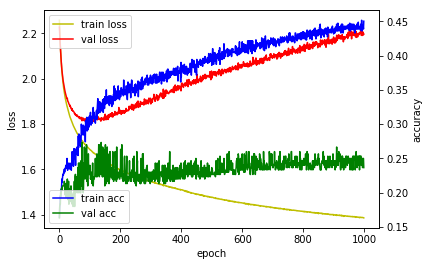

In [7]:
# 5. 학습과정 살펴보기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()